In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [427]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [428]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [429]:
from cmath import nan


def transforme_sex(x):
    if x == "Male":
        return 0
    else:
        return 1

train["Age"] = train["Age"].fillna(value=10)
train['Sex'] = train["Sex"].apply(transforme_sex)
train['Embarked'] = train['Embarked'].replace({'S':0, 'C':1, 'Q':2, nan:3})
train['Cabin'] = train['Cabin'].apply(lambda x:x[0] if type(x) == str else nan)
train['Cabin'] = train['Cabin'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, nan:8})
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,8.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,8.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,10.0,1,2,W./C. 6607,23.4500,8.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,2.0,1.0


In [430]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 83.7+ KB


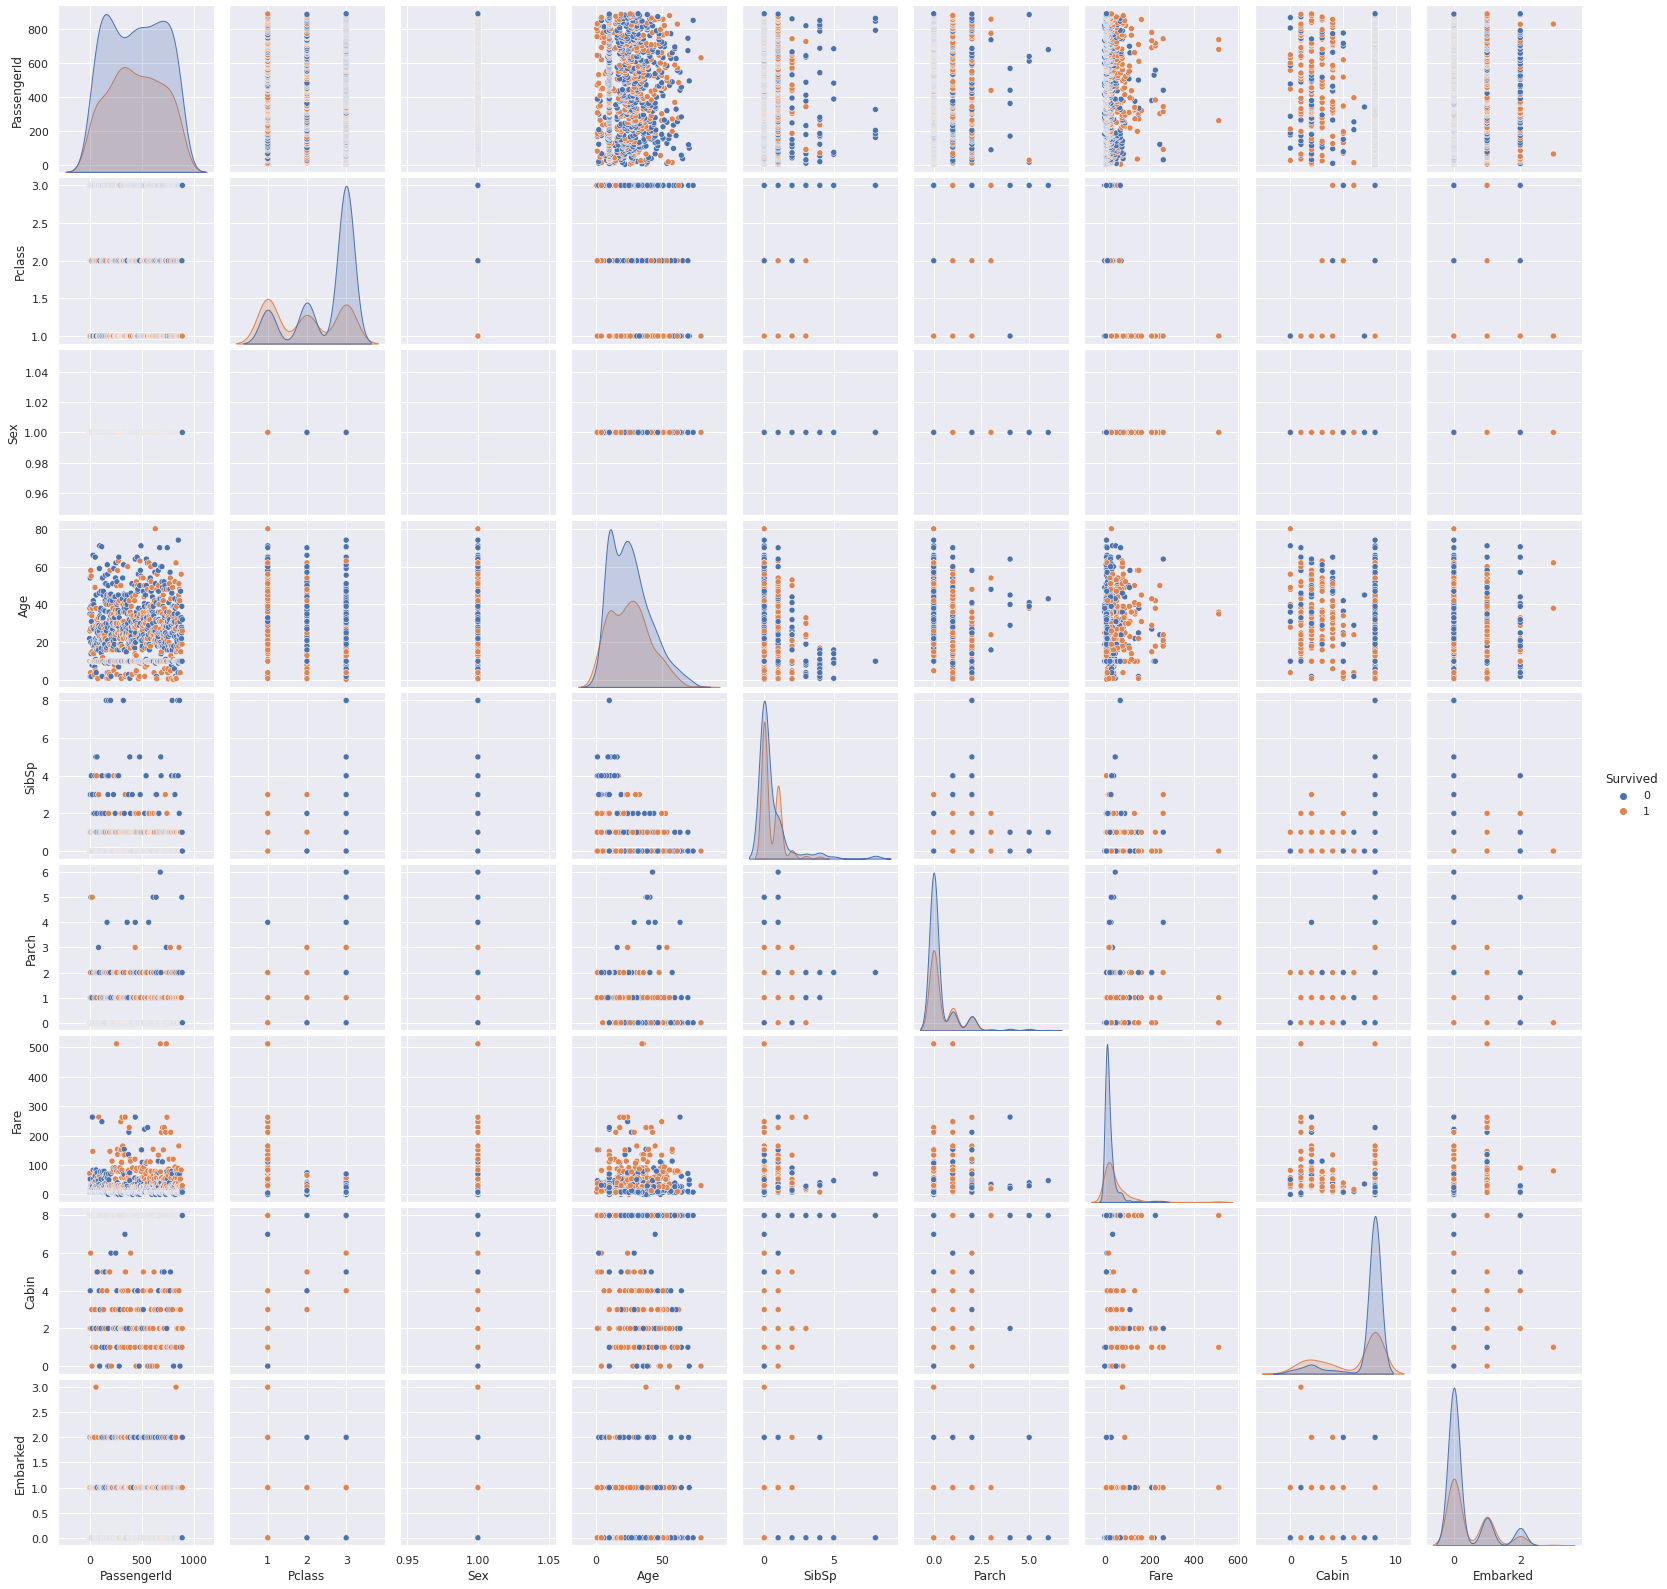

In [431]:
sns.pairplot(train, hue="Survived")

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(train[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']],train["Survived"],test_size=0.2,random_state=42)

logistic = LogisticRegression(max_iter=100_000_000).fit(X_train,y_train)
y_pred = logistic.predict(X_test)
accuracy_score(y_test,y_pred)



0.7318435754189944

In [433]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.7262569832402235

In [434]:
from sklearn.neural_network import MLPClassifier

neuralclf = MLPClassifier(max_iter = 1_000_000,solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1).fit(X_train,y_train)
y_pred = neuralclf.predict(X_test)
accuracy_score(y_test,y_pred)


0.7150837988826816

In [435]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [436]:
from cmath import nan


def transforme_sex(x):
    if x == "Male":
        return 0
    else:
        return 1

test["Age"] = test["Age"].fillna(value=10)
test['Sex'] = test["Sex"].apply(transforme_sex)
test['Embarked'] = test['Embarked'].replace({'S':0, 'C':1, 'Q':2, nan:3})
test['Cabin'] = test['Cabin'].apply(lambda x:x[0] if type(x) == str else nan)
test['Cabin'] = test['Cabin'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, nan:8})
test['Fare'] = test['Fare'].fillna(value=test['Fare'].mean())

In [440]:
test['Survived'] = rf.predict(test[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']])
test[['PassengerId','Survived']].to_csv('rf_yhat.csv',index=False)

In [442]:
test['Survived'] = logistic.predict(test[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']])
test[['PassengerId','Survived']].to_csv('logistic_yhat.csv',index=False)

In [443]:
test['Survived'] = neuralclf.predict(test[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']])
test[['PassengerId','Survived']].to_csv('neuralclf_yhat.csv',index=False)